In [1]:

# Import Libraries
import pandas as pd
import numpy as np
import os
from dask import dataframe as dd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from dateutil.relativedelta import relativedelta


In [2]:

ReadCSV = True

# Import original dataset
FileName = "DM with PVD 14-10-21.csv"
Path = r"O:\GIRFT DiRAC\Errors in HES\Diabetes"
FilePath = os.path.join(Path, FileName)

ReadCSV = True
if ReadCSV:
    df_ini = pd.read_csv(FilePath)
    
print('Columns:')
print(df_ini.columns)

print('Size of dataset:', df_ini.shape)
df_ini.head()


C:\Users\flavien.hardy\OneDrive - NHS Improvement\Desktop\FH_Local\env\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Columns:
Index(['P_Spell_ID', 'HESID', 'Admission_date', 'Discharge_date',
       'P_Spell_ID1', 'Epikey', 'procedure_group', 'sex', 'EPIstart', 'EPIend',
       'HESID1', 'epiorder', 'ProvCode', 'Sitecode', 'LSOA_2011_Code',
       'main_specialty_code', 'Main_Specialty_Description', 'age_of_patient',
       'diagnosis_group', 'POD', 'MORT', 'FinY', 'Read30', 'Read90',
       'Admission_date1', 'Discharge_date1', 'Spell_Los', 'diagnosis_group1',
       'diffdates'],
      dtype='object')
Size of dataset: (1704322, 29)


,P_Spell_ID,HESID,Admission_date,Discharge_date,P_Spell_ID1,Epikey,procedure_group,sex,EPIstart,EPIend,...,POD,MORT,FinY,Read30,Read90,Admission_date1,Discharge_date1,Spell_Los,diagnosis_group1,diffdates
0,232,00001150E47271E571C90DB437F0FE9E,2020-06-21 00:00:00,2020-07-10 00:00:00,232,700924415399,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,Male,2020-06-21 00:00:00,2020-06-21 00:00:00,...,EM,0,2020/21,NaN,NaN,2020-06-21 00:00:00,2020-07-10 00:00:00,19,S7230~W010~R296~N179~Z115~K573~L97X~E115~I10X~...,0
1,232,00001150E47271E571C90DB437F0FE9E,2020-06-21 00:00:00,2020-07-10 00:00:00,232,700924415407,W201~Z764~Z942~U136~Y981~Z843~Z942~-1~-1~-1~-1...,Male,2020-06-21 00:00:00,2020-07-10 00:00:00,...,EM,0,2020/21,NaN,NaN,2020-06-21 00:00:00,2020-07-10 00:00:00,19,S7230~W010~R296~N179~Z115~K573~L97X~E115~I10X~...,0
2,233,00001150E47271E571C90DB437F0FE9E,2020-11-03 00:00:00,2020-11-10 00:00:00,233,700924451657,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,Male,2020-11-03 00:00:00,2020-11-10 00:00:00,...,EM,0,2020/21,Y,Y,2020-11-03 00:00:00,2020-11-10 00:00:00,7,K922~K573~R296~D509~Z115~L97X~E115~I10X~N183~M...,0
3,233,00001150E47271E571C90DB437F0FE9E,2020-11-03 00:00:00,2020-11-10 00:00:00,234,700924559420,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,Male,2020-11-17 00:00:00,2020-11-17 00:00:00,...,EM,0,2020/21,NaN,NaN,2020-11-17 00:00:00,2020-11-23 00:00:00,6,K922~K573~R296~D509~Z115~L97X~E115~I10X~N183~M...,14
4,233,00001150E47271E571C90DB437F0FE9E,2020-11-03 00:00:00,2020-11-10 00:00:00,234,700924559427,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,Male,2020-11-17 00:00:00,2020-11-23 00:00:00,...,EM,0,2020/21,NaN,NaN,2020-11-17 00:00:00,2020-11-23 00:00:00,6,K922~K573~R296~D509~Z115~L97X~E115~I10X~N183~M...,14


# Patient Characteristics

In [4]:

# File for IMD scores 
FileName = "File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv"
Path = r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\0_Raw"
FilePath = os.path.join(Path, FileName)
df_IMD = pd.read_csv(FilePath)
df_IMD.head()


,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners),Dependent Children aged 0-15: mid 2012 (excluding prisoners),Population aged 16-59: mid 2012 (excluding prisoners),Older population aged 60 and over: mid 2012 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01031349,Adur 001A,E07000223,Adur,12.389,21352,7,0.096,18992,6,...,20379,7,0.312,11318,4,1318,206,694,418,702.75
1,E01031350,Adur 001B,E07000223,Adur,28.619,8864,3,0.187,9233,3,...,16285,5,0.234,12445,4,1212,232,712,268,720.75
2,E01031351,Adur 001C,E07000223,Adur,11.713,22143,7,0.065,24539,8,...,25054,8,0.208,12820,4,1577,290,829,458,838.25
3,E01031352,Adur 001D,E07000223,Adur,16.446,17252,6,0.117,16087,5,...,24455,8,0.109,14350,5,1453,233,739,481,748.25
4,E01031370,Adur 001E,E07000223,Adur,18.265,15643,5,0.102,17918,6,...,20214,7,0.321,11202,4,1443,306,799,338,795.50


In [11]:

# Find Unique First Spells
df_First = df_ini.sort_values(by=['HESID', 'EPIend']).drop_duplicates(subset=['HESID'], keep='first')

# --------------------------------------------
df_Table1 = df_First # Unique patients, first spells
N_Patients = df_Table1.shape[0]
print('Number of unique patients/first spells:', N_Patients)
print('\n')

AgeMin_List = [0, 18, 40, 60, 80] + [999]
AgeMax_List = [age-1 for age in AgeMin_List[1:] ] + [999]
for k in range(len(AgeMin_List)):
    AgeMin = AgeMin_List[k]
    AgeMax = AgeMax_List[k]
    FilterAge = (df_Table1['age_of_patient']>=AgeMin) & (df_Table1['age_of_patient']<=AgeMax)
    
    df_Age = df_Table1.loc[FilterAge, :]
    print('Age band:', AgeMin, '-', AgeMax)
    print('\t Number of patients:', df_Age.shape[0], 'corresponding to %0.2f' % (100*df_Age.shape[0]/N_Patients), '%')

print('\n')

# --------------------------------------------
# Sex
Filter_Male = df_Table1['sex']=='Male'
Filter_Female = df_Table1['sex']=='Female'

N_Males = df_Table1[Filter_Male].shape[0]
N_Females = df_Table1[Filter_Female].shape[0]
Missing_Sex = N_Patients - (N_Males + N_Females)
Prop_Males = 100*N_Males/N_Patients
Prop_Females = 100*N_Females/N_Patients
Prop_Missing = 100*Missing_Sex/N_Patients

print('Number of Male patients:', N_Males, 'corresponding to %0.2f' % Prop_Males, '%' )
print('Number of Female patients:', N_Females, 'corresponding to %0.2f' % Prop_Females, '%' )
print('Number of missing sex:', Missing_Sex, 'corresponding to %0.2f' % Prop_Missing, '%' )

print('\n')
# --------------------------------------------
# Deprivation Quintile
ColumnList = ['LSOA code (2011)', 'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']
df_IMD_Sub = df_IMD[ColumnList]

df_Table1 = pd.merge(df_Table1, df_IMD_Sub, left_on='LSOA_2011_Code', right_on='LSOA code (2011)', how='left')
df_Table1 = df_Table1.drop(columns=['LSOA code (2011)'])
df_Table1 = df_Table1.rename(columns={'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)':'IMD Deciles'})
df_Table1.head()

Decile_List = range(1,10+1)
for k in range(5):
    Decile_Max = Decile_List[k]*2
    Decile_Min = Decile_Max-1

    Filter_Quintiles = (df_Table1["IMD Deciles"]>=Decile_Min) & (df_Table1["IMD Deciles"]<=Decile_Max)
    N_Patients_Quintile = df_Table1[Filter_Quintiles].shape[0]
    Prop = 100*N_Patients_Quintile/N_Patients
    print('IMD Deciles:', Decile_Min, '-', Decile_Max)
    print('\t Number of patients:', N_Patients_Quintile, 'corresponding to %0.2f' % Prop, '%')

N_MissingIMD = df_Table1["IMD Deciles"].isnull().sum()
Prop_Missing = 100*N_MissingIMD/N_Patients
print('Number of missing IMD:', N_MissingIMD, 'corresponding to %0.2f' % Prop_Missing, '%')

print('\n')
# --------------------------------------------
# Number of readmissions
df_Count = df_ini.copy()
df_UniqueSpells = df_Count.sort_values(by=['HESID', 'EPIend']).drop_duplicates(subset=['P_Spell_ID'], keep='first')[['HESID','P_Spell_ID']]
df_NumberSpells = df_UniqueSpells.groupby(by='HESID').agg('count').reset_index().rename(columns={'P_Spell_ID':'Number Spells'})
df_NumberSpells.loc[:, 'Number Readmissions'] = df_NumberSpells.loc[:, 'Number Spells']-1
Readmissions_Describe = df_NumberSpells['Number Readmissions'].describe()
print('Number of readmissions:', Readmissions_Describe['50%'], '(', Readmissions_Describe['25%'], '-', Readmissions_Describe['75%'], ')')

SaveCSV = True
if SaveCSV:
    df_NumberSpells.to_csv(r'O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\1_Processed\Fig1_diabetes_NumberReadmissions.csv')


Number of unique patients/first spells: 117248


Age band: 0 - 17
	 Number of patients: 9 corresponding to 0.01 %
Age band: 18 - 39
	 Number of patients: 1246 corresponding to 1.06 %
Age band: 40 - 59
	 Number of patients: 23683 corresponding to 20.20 %
Age band: 60 - 79
	 Number of patients: 60167 corresponding to 51.32 %
Age band: 80 - 998
	 Number of patients: 31897 corresponding to 27.20 %
Age band: 999 - 999
	 Number of patients: 246 corresponding to 0.21 %


Number of Male patients: 80769 corresponding to 68.89 %
Number of Female patients: 36409 corresponding to 31.05 %
Number of missing sex: 70 corresponding to 0.06 %


IMD Deciles: 1 - 2
	 Number of patients: 24015 corresponding to 20.48 %
IMD Deciles: 3 - 4
	 Number of patients: 20825 corresponding to 17.76 %
IMD Deciles: 5 - 6
	 Number of patients: 18409 corresponding to 15.70 %
IMD Deciles: 7 - 8
	 Number of patients: 15212 corresponding to 12.97 %
IMD Deciles: 9 - 10
	 Number of patients: 12381 corresponding to 10.56 %
Numb

(0.0, 0.7)

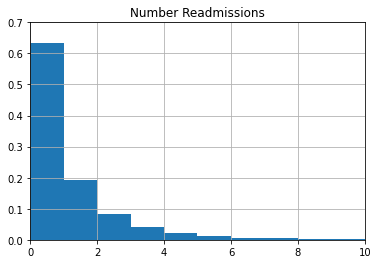

In [10]:

X = 'Number Readmissions'
Max = 10
Filter = df_NumberSpells.loc[:, X] <= Max
df_NumberSpells[Filter].hist(X, density=True)
plt.xlim(0, Max)
plt.ylim(0, 0.7)


# Identification of Errors

## Preprocessing

In [17]:
df_ini.columns

Index(['P_Spell_ID', 'HESID', 'Admission_date', 'Discharge_date',
       'P_Spell_ID1', 'Epikey', 'procedure_group', 'sex', 'EPIstart', 'EPIend',
       'HESID1', 'epiorder', 'ProvCode', 'Sitecode', 'LSOA_2011_Code',
       'main_specialty_code', 'Main_Specialty_Description', 'age_of_patient',
       'diagnosis_group', 'POD', 'MORT', 'FinY', 'Read30', 'Read90',
       'Admission_date1', 'Discharge_date1', 'Spell_Los', 'diagnosis_group1',
       'diffdates'],
      dtype='object')

In [31]:

df = df_ini.copy()

# --------------------------------------------------
def PreProcessing(df_ini):
    df = df_ini.copy()
    
    # Reorganising features
    ColumnList = ['P_Spell_ID1', 'HESID1',
                  'Admission_date1', 'Discharge_date1',
                  'EPIstart', 'EPIend', 'epiorder',
                  'diagnosis_group', 'procedure_group', 
                  'age_of_patient', 'sex', 'Spell_Los', 'ProvCode', 'Sitecode',
                  'LSOA_2011_Code', 'main_specialty_code', 'Main_Specialty_Description',
                  'POD', 'MORT', 'FinY', 'Read30', 'Read90']

    df = df.loc[:, ColumnList]
    
    # Renaming features
    df = df.rename(columns={'P_Spell_ID1':'P_Spell_ID',
                            'HESID1':'HESID',
                            'Admission_date1':'Admission_date',
                            'Discharge_date1':'Discharge_date'})

    # Converting date features
    DateFeatures = ['Admission_date', 'Discharge_date',
                    'EPIstart', 'EPIend']
    for datefeature in DateFeatures:
        df.loc[:, datefeature] = pd.to_datetime( df.loc[:, datefeature], format='%Y-%m-%d %H:%M:%S' )

    return df
# --------------------------------------------------

df = PreProcessing(df_ini)
df.head()


,P_Spell_ID,HESID,Admission_date,Discharge_date,EPIstart,EPIend,epiorder,diagnosis_group,procedure_group,age_of_patient,...,ProvCode,Sitecode,LSOA_2011_Code,main_specialty_code,Main_Specialty_Description,POD,MORT,FinY,Read30,Read90
0,232,00001150E47271E571C90DB437F0FE9E,2020-06-21,2020-07-10,2020-06-21,2020-06-21,1,S7230~W010~R296~N179~Z115~K573~L97X~E115~I10X~...,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,86,...,RTD,RTD02,E01008370,110,Trauma & Orthopaedics,EM,0,2020/21,NaN,NaN
1,232,00001150E47271E571C90DB437F0FE9E,2020-06-21,2020-07-10,2020-06-21,2020-07-10,2,S7230~R296~D509~N179~Z115~K573~L97X~E115~I10X~...,W201~Z764~Z942~U136~Y981~Z843~Z942~-1~-1~-1~-1...,86,...,RTD,RTD02,E01008370,110,Trauma & Orthopaedics,EM,0,2020/21,NaN,NaN
2,233,00001150E47271E571C90DB437F0FE9E,2020-11-03,2020-11-10,2020-11-03,2020-11-10,1,K922~K573~R296~D509~Z115~L97X~E115~I10X~N183~M...,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,87,...,RTD,RTD02,E01008370,100,General surgery,EM,0,2020/21,Y,Y
3,234,00001150E47271E571C90DB437F0FE9E,2020-11-17,2020-11-23,2020-11-17,2020-11-17,1,R54X~K573~D509~I10X~N183~F019~M109~M199~Z115~Z...,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,87,...,RTD,RTD02,E01008370,300,General Internal Medicine,EM,0,2020/21,NaN,NaN
4,234,00001150E47271E571C90DB437F0FE9E,2020-11-17,2020-11-23,2020-11-17,2020-11-23,2,R54X~K573~D509~I10X~N183~F019~M109~M199~Z115~Z...,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,87,...,RTD,RTD01,E01008370,301,Gastroenterology,EM,0,2020/21,NaN,NaN


## Find mentions of mandatory code

In [38]:

# Find Mentions of Mandatory Codes in CodeList in ICDfeature_Name
# --------------------------------------------------
def FindMandatoryCode(df_ini, ICDfeature_Name, ConditionName, CodeList):
    df = df_ini.copy()
    
    Codes = '|'.join(CodeList)

    # Look for ANY mention of mandatory code
    Filter = df[ICDfeature_Name].str.contains(Codes)
    df.loc[:, "ICD10_" + ConditionName] = np.where(Filter, 1, 0)

    return df
# --------------------------------------------------

df_DiabetesErrors = FindMandatoryCode(df, "diagnosis_group", "Diabetes", ['E115'])
df_DiabetesErrors.head()


,P_Spell_ID,HESID,Admission_date,Discharge_date,EPIstart,EPIend,epiorder,diagnosis_group,procedure_group,age_of_patient,...,Sitecode,LSOA_2011_Code,main_specialty_code,Main_Specialty_Description,POD,MORT,FinY,Read30,Read90,ICD10_Diabetes
0,232,00001150E47271E571C90DB437F0FE9E,2020-06-21,2020-07-10,2020-06-21,2020-06-21,1,S7230~W010~R296~N179~Z115~K573~L97X~E115~I10X~...,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,86,...,RTD02,E01008370,110,Trauma & Orthopaedics,EM,0,2020/21,NaN,NaN,1
1,232,00001150E47271E571C90DB437F0FE9E,2020-06-21,2020-07-10,2020-06-21,2020-07-10,2,S7230~R296~D509~N179~Z115~K573~L97X~E115~I10X~...,W201~Z764~Z942~U136~Y981~Z843~Z942~-1~-1~-1~-1...,86,...,RTD02,E01008370,110,Trauma & Orthopaedics,EM,0,2020/21,NaN,NaN,1
2,233,00001150E47271E571C90DB437F0FE9E,2020-11-03,2020-11-10,2020-11-03,2020-11-10,1,K922~K573~R296~D509~Z115~L97X~E115~I10X~N183~M...,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,87,...,RTD02,E01008370,100,General surgery,EM,0,2020/21,Y,Y,1
3,234,00001150E47271E571C90DB437F0FE9E,2020-11-17,2020-11-23,2020-11-17,2020-11-17,1,R54X~K573~D509~I10X~N183~F019~M109~M199~Z115~Z...,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,87,...,RTD02,E01008370,300,General Internal Medicine,EM,0,2020/21,NaN,NaN,0
4,234,00001150E47271E571C90DB437F0FE9E,2020-11-17,2020-11-23,2020-11-17,2020-11-23,2,R54X~K573~D509~I10X~N183~F019~M109~M199~Z115~Z...,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,87,...,RTD01,E01008370,301,Gastroenterology,EM,0,2020/21,NaN,NaN,0


In [40]:

# --------------------------------------------------
def FindErrors(df_ini, ConditionName):
    df = df_ini.copy()
    
    Filter_Code = df["ICD10_"+ConditionName] == 1
    df_Code = df[Filter_Code]
    df_NoCode = df[~Filter_Code]

    # Keep first occurence of mandatory code
    df_CodeFirst = df_Code.sort_values(by=['HESID', 'EPIend']).drop_duplicates(subset=['HESID'], keep='first')
    
    ColumnList = ['HESID', 'EPIend', 'ProvCode']
    df = pd.merge( df, df_CodeFirst[ColumnList], how='left', on='HESID' )
    df = df.rename(columns={'EPIend_x':'EPIend', 'EPIend_y':'EPIend_First',
                            'ProvCode_x':'ProvCode',
                            'ProvCode_y':'ProvCode_First'})
    
    # Find errors in dataset
    Filter_Error = (df["ICD10_"+ConditionName]==0) & (df['EPIend_First']<=df['EPIend'])
    df.loc[:, 'Error_'+ConditionName] = np.where(Filter_Error, 1, 0)

    df = df.sort_values(by=['HESID', 'EPIstart', 'EPIend'])
    
    return df
# --------------------------------------------------

df_DiabetesErrors_2 = FindErrors(df_DiabetesErrors, "Diabetes")
df_DiabetesErrors_2.head()

SaveCSV = True
if SaveCSV:
    df_DiabetesErrors_2.to_csv(r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\1_Processed\Diabetes_FlaggedErrors.csv")
    